# SPINN NF2
> NF2 + SPINN

## Input data

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "3"

In [ ]:
from zpinn.lowloumag import LowLouMag

In [ ]:
b = LowLouMag(resolutions=[64, 64, 64])
b.calculate()

ImageData (0x7f1f1ff00be0)
  N Cells:      250047
  N Points:     262144
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 2.000e+00
  Dimensions:   64, 64, 64
  Spacing:      3.175e-02, 3.175e-02, 3.175e-02
  N Arrays:     3

In [ ]:
import pickle

In [ ]:
with open("b.pickle","rb") as f:
    b = pickle.load(f)

In [ ]:
b.bottom

PolyData (0x7f1f411539a0)
  N Cells:    3969
  N Points:   4096
  N Strips:   0
  X Bounds:   -1.000e+00, 1.000e+00
  Y Bounds:   -1.000e+00, 1.000e+00
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   5

In [ ]:
b_norm = 100

In [ ]:
b_bottom = b.b_bottom / b_norm
b_bottom.shape

(64, 64, 3)

In [ ]:
import matplotlib.pyplot as plt

<matplotlib.image.AxesImage>

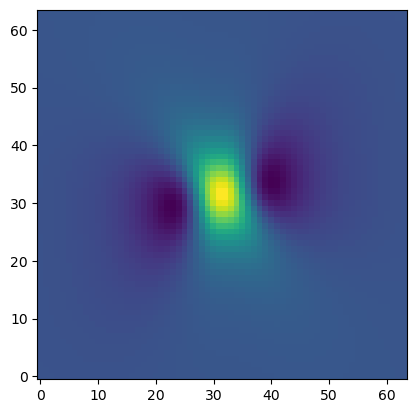

In [ ]:
plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower')

In [ ]:
from zpinn.pinn_nf2_potential import get_potential_field

/userhome/jeon_mg/mambaforge/envs/pinf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
bp = get_potential_field(b, height=64)
bp.calculate_potential_fields()

Potential Field: 100%|██████████| 201/201 [00:03<00:00, 60.06it/s] 


ImageData (0x7f1ea1e3a1a0)
  N Cells:      250047
  N Points:     262144
  X Bounds:     0.000e+00, 6.300e+01
  Y Bounds:     0.000e+00, 6.300e+01
  Z Bounds:     0.000e+00, 6.300e+01
  Dimensions:   64, 64, 64
  Spacing:      1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:     2

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "3"

In [ ]:
import numpy as np

In [ ]:
Nx, Ny, Nz =  bp.grid.dimensions
bottom_subset = (0, Nx-1, 0, Ny-1, 0, 0)
bottom = bp.grid.extract_subset(bottom_subset).extract_surface()
bp_bottom = bottom['B'].reshape(Nx, Ny, 3)
bp_bottom = np.array(bp_bottom) / b_norm
bottom

PolyData (0x7f1ea1e394e0)
  N Cells:    3969
  N Points:   4096
  N Strips:   0
  X Bounds:   0.000e+00, 6.300e+01
  Y Bounds:   0.000e+00, 6.300e+01
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   4

In [ ]:
Nx, Ny, Nz =  bp.grid.dimensions
top_subset = (0, Nx-1, 0, Ny-1, Nz-1, Nz-1)
top = bp.grid.extract_subset(top_subset).extract_surface()
bp_top = top['B'].reshape(Nx, Ny, 3)
bp_top = np.array(bp_top) / b_norm
top

PolyData (0x7f1ea1e384c0)
  N Cells:    3969
  N Points:   4096
  N Strips:   0
  X Bounds:   0.000e+00, 6.300e+01
  Y Bounds:   0.000e+00, 6.300e+01
  Z Bounds:   6.300e+01, 6.300e+01
  N Arrays:   4

In [ ]:
Nx, Ny, Nz =  bp.grid.dimensions
lateral_bounds_1 = (0, 0, 0, Ny-1, 0, Nz-1)
lateral_1 = bp.grid.extract_subset(lateral_bounds_1).extract_surface()
bp_lateral_1 = lateral_1['B'].reshape(Ny, Nz, 3)
bp_lateral_1 = np.array(bp_lateral_1) / b_norm
lateral_1

PolyData (0x7f1ea1e39a80)
  N Cells:    3969
  N Points:   4096
  N Strips:   0
  X Bounds:   0.000e+00, 0.000e+00
  Y Bounds:   0.000e+00, 6.300e+01
  Z Bounds:   0.000e+00, 6.300e+01
  N Arrays:   4

In [ ]:
Nx, Ny, Nz =  bp.grid.dimensions
lateral_bounds_2 = (Nx-1, Nx-1, 0, Ny-1, 0, Nz-1)
lateral_2 = bp.grid.extract_subset(lateral_bounds_2).extract_surface()
bp_lateral_2 = lateral_2['B'].reshape(Ny, Nz, 3)
bp_lateral_2 = np.array(bp_lateral_2) / b_norm
lateral_2

PolyData (0x7f1ea1e38820)
  N Cells:    3969
  N Points:   4096
  N Strips:   0
  X Bounds:   6.300e+01, 6.300e+01
  Y Bounds:   0.000e+00, 6.300e+01
  Z Bounds:   0.000e+00, 6.300e+01
  N Arrays:   4

In [ ]:
Nx, Ny, Nz =  bp.grid.dimensions
lateral_bounds_3 = (0, Nx-1, 0, 0, 0, Nz-1)
lateral_3 = bp.grid.extract_subset(lateral_bounds_3).extract_surface()
bp_lateral_3 = lateral_3['B'].reshape(Nx, Nz, 3)
bp_lateral_3 = np.array(bp_lateral_3) / b_norm
lateral_3

PolyData (0x7f1ea1e3b760)
  N Cells:    3969
  N Points:   4096
  N Strips:   0
  X Bounds:   0.000e+00, 6.300e+01
  Y Bounds:   0.000e+00, 0.000e+00
  Z Bounds:   0.000e+00, 6.300e+01
  N Arrays:   4

In [ ]:
Nx, Ny, Nz =  bp.grid.dimensions
lateral_bounds_4 = (0, Nx-1, Ny-1, Ny-1, 0, Nz-1)
lateral_4 = bp.grid.extract_subset(lateral_bounds_4).extract_surface()
bp_lateral_4 = lateral_4['B'].reshape(Nx, Nz, 3)
bp_lateral_4 = np.array(bp_lateral_4) / b_norm
lateral_4

PolyData (0x7f1ea1e39c00)
  N Cells:    3969
  N Points:   4096
  N Strips:   0
  X Bounds:   0.000e+00, 6.300e+01
  Y Bounds:   6.300e+01, 6.300e+01
  Z Bounds:   0.000e+00, 6.300e+01
  N Arrays:   4

# Model

In [ ]:
import jax 
import jax.numpy as jnp
from jax import jvp
import optax
from flax import linen as nn 

from typing import Sequence
from functools import partial

import time
from tqdm import trange

ModuleNotFoundError: No module named 'optax'

In [ ]:
def hvp_fwdfwd(f, primals, tangents, return_primals=False):
    g = lambda primals: jvp(f, (primals,), tangents)[1]
    primals_out, tangents_out = jvp(g, primals, tangents)
    if return_primals:
        return primals_out, tangents_out
    else:
        return tangents_out
    
@partial(jax.jit, static_argnums=(0,))
def update_model(optim, gradient, params, state):
    updates, state = optim.update(gradient, state)
    params = optax.apply_updates(params, updates)
    return params, state

In [ ]:
class SPINN3d(nn.Module):
    features: Sequence[int]
    r: int
    out_dim: int
    pos_enc: int
    mlp: str

    @nn.compact
    def __call__(self, x, y, z):
        '''
        inputs: input factorized coordinates
        outputs: feature output of each body network
        xy: intermediate tensor for feature merge btw. x and y axis
        pred: final model prediction (e.g. for 2d output, pred=[u, v])
        '''
        if self.pos_enc != 0:
            # positional encoding only to spatial coordinates
            freq = jnp.expand_dims(jnp.arange(1, self.pos_enc+1, 1), 0)
            y = jnp.concatenate((jnp.ones((y.shape[0], 1)), jnp.sin(y@freq), jnp.cos(y@freq)), 1)
            z = jnp.concatenate((jnp.ones((z.shape[0], 1)), jnp.sin(z@freq), jnp.cos(z@freq)), 1)

            # causal PINN version (also on time axis)
            #  freq_x = jnp.expand_dims(jnp.power(10.0, jnp.arange(0, 3)), 0)
            # x = x@freq_x
            
        inputs, outputs, xy, pred = [x, y, z], [], [], []
        init = nn.initializers.glorot_normal()

        if self.mlp == 'mlp':
            for X in inputs:
                for fs in self.features[:-1]:
                    X = nn.Dense(fs, kernel_init=init)(X)
                    X = nn.activation.tanh(X)
                X = nn.Dense(self.r*self.out_dim, kernel_init=init)(X)
                outputs += [jnp.transpose(X, (1, 0))]

        elif self.mlp == 'modified_mlp':
            for X in inputs:
                U = nn.activation.tanh(nn.Dense(self.features[0], kernel_init=init)(X))
                V = nn.activation.tanh(nn.Dense(self.features[0], kernel_init=init)(X))
                H = nn.activation.tanh(nn.Dense(self.features[0], kernel_init=init)(X))
                for fs in self.features[:-1]:
                    Z = nn.Dense(fs, kernel_init=init)(H)
                    Z = nn.activation.tanh(Z)
                    H = (jnp.ones_like(Z)-Z)*U + Z*V
                H = nn.Dense(self.r*self.out_dim, kernel_init=init)(H)
                outputs += [jnp.transpose(H, (1, 0))]
        
        for i in range(self.out_dim):
            xy += [jnp.einsum('fx, fy->fxy', outputs[0][self.r*i:self.r*(i+1)], outputs[1][self.r*i:self.r*(i+1)])]
            pred += [jnp.einsum('fxy, fz->xyz', xy[i], outputs[-1][self.r*i:self.r*(i+1)])]

        if len(pred) == 1:
            # 1-dimensional output
            return pred[0]
        else:
            # n-dimensional output
            return pred

In [ ]:
seed = 111
key = jax.random.PRNGKey(seed)
key, subkey = jax.random.split(key, 2)

In [ ]:
nc = 64 # number of collocation points

features = 256 # feature size of each layer
n_layers = 8 # the number of layer
feat_sizes = tuple([features for _ in range(n_layers)]) # feature sizes
r = 128 # rank of a approximated tensor
out_dim = 3 # size of model output

lr = 5e-4 # learning rate

epochs = 2000 #10000
log_iter = 100 #1000

# Loss weight
# lbda_c = 100
# lbda_ic = 10

In [ ]:
@partial(jax.jit, static_argnums=(0,))
def generate_train_data(nc, key):
    keys = jax.random.split(key, 4)
    
    # collocation points
#     xc = jax.random.uniform(keys[1], (nc, 1), minval=0., maxval=2.)
#     yc = jax.random.uniform(keys[2], (nc, 1), minval=0., maxval=2.)
#     zc = jax.random.uniform(keys[3], (nc, 1), minval=0., maxval=2.)
    xc = jnp.linspace(0, 2, nc).reshape(nc, 1)
    yc = jnp.linspace(0, 2, nc).reshape(nc, 1)
    zc = jnp.linspace(0, 2, nc).reshape(nc, 1)

    # # boundary points
    xb = [jnp.linspace(0, 2, nc).reshape(nc, 1), # z=0   bottom
          jnp.linspace(0, 2, nc).reshape(nc, 1), # z=2   top
          jnp.array([[0.]]),                     # x=0   lateral_1
          jnp.array([[2.]]),                     # x=2   lateral_2
          jnp.linspace(0, 2, nc).reshape(nc, 1), # y=0   lateral_3
          jnp.linspace(0, 2, nc).reshape(nc, 1)] # y=2   lateral_4

    yb = [jnp.linspace(0, 2, nc).reshape(nc, 1), 
          jnp.linspace(0, 2, nc).reshape(nc, 1), 
          jnp.linspace(0, 2, nc).reshape(nc, 1), 
          jnp.linspace(0, 2, nc).reshape(nc, 1), 
          jnp.array([[0.]]), 
          jnp.array([[2.]])]

    zb = [jnp.array([[0.]]), 
          jnp.array([[2.]]), 
          jnp.linspace(0, 2, nc).reshape(nc, 1), 
          jnp.linspace(0, 2, nc).reshape(nc, 1), 
          jnp.linspace(0, 2, nc).reshape(nc, 1), 
          jnp.linspace(0, 2, nc).reshape(nc, 1)]

    return xc, yc, zc, xb, yb, zb

In [ ]:
def curlx(apply_fn, params, x, y, z):
    # curl vector w/ forward-mode AD
    # w_x = uz_y - uy_z
    vec_z = jnp.ones(z.shape)
    vec_y = jnp.ones(y.shape)
    uy_z = jvp(lambda z: apply_fn(params, x, y, z)[1], (z,), (vec_z,))[1]
    uz_y = jvp(lambda y: apply_fn(params, x, y, z)[2], (y,), (vec_y,))[1]
    wx = uz_y - uy_z
    return wx


def curly(apply_fn, params, x, y, z):
    # curl vector w/ forward-mode AD
    # w_y = ux_z - uz_x
    vec_z = jnp.ones(z.shape)
    vec_x = jnp.ones(x.shape)
    ux_z = jvp(lambda z: apply_fn(params, x, y, z)[0], (z,), (vec_z,))[1]
    uz_x = jvp(lambda x: apply_fn(params, x, y, z)[2], (x,), (vec_x,))[1]
    wy = ux_z - uz_x
    return wy

def curlz(apply_fn, params, x, y, z):
    # curl vector w/ forward-mode AD
    # w_z = uy_x - ux_y
    vec_y = jnp.ones(y.shape)
    vec_x = jnp.ones(x.shape)
    ux_y = jvp(lambda y: apply_fn(params, x, y, z)[0], (y,), (vec_y,))[1]
    uy_x = jvp(lambda x: apply_fn(params, x, y, z)[1], (x,), (vec_x,))[1]
    wz = uy_x - ux_y
    return wz


In [ ]:
@partial(jax.jit, static_argnums=(0,))
def apply_model_spinn(apply_fn, params, *train_data):
    def residual_loss(params, x, y, z):
        # calculate u
        Bx, By, Bz = apply_fn(params, x, y, z)
        B = jnp.stack([Bx, By, Bz], axis=-1)
        
        # calculate J
        Jx = curlx(apply_fn, params, x, y, z)
        Jy = curly(apply_fn, params, x, y, z)
        Jz = curlz(apply_fn, params, x, y, z)
        J = jnp.stack([Jx, Jy, Jz], axis=-1)

        JxB = jnp.cross(J, B, axis=-1) 

        #-----------------------------------------------------------
        loss_ff = jnp.sum(JxB**2, axis=-1) / (jnp.sum(B**2, axis=-1) + 1e-7)
        loss_ff = jnp.mean(loss_ff)

        # loss_ff = jnp.mean(JxB**2)

        # loss_ff = jnp.sum(JxB**2, axis=-1)
        # loss_ff = jnp.mean(loss_ff)
        #-----------------------------------------------------------

        # tangent vector dx/dx
        # assumes x, y, z have same shape (very important)
        vec = jnp.ones(x.shape)
        
        Bx_x = jvp(lambda x: apply_fn(params, x, y, z)[0], (x,), (vec,))[1]
        # Bx_y = jvp(lambda y: apply_fn(params, x, y, z)[0], (y,), (vec,))[1]
        # Bx_z = jvp(lambda z: apply_fn(params, x, y, z)[0], (z,), (vec,))[1]

        # By_x = jvp(lambda x: apply_fn(params, x, y, z)[1], (x,), (vec,))[1]
        By_y = jvp(lambda y: apply_fn(params, x, y, z)[1], (y,), (vec,))[1]
        # By_z = jvp(lambda z: apply_fn(params, x, y, z)[1], (z,), (vec,))[1]

        # Bz_x = jvp(lambda x: apply_fn(params, x, y, z)[2], (x,), (vec,))[1]
        # Bz_y = jvp(lambda y: apply_fn(params, x, y, z)[2], (y,), (vec,))[1]
        Bz_z = jvp(lambda z: apply_fn(params, x, y, z)[2], (z,), (vec,))[1]

        divB = Bx_x + By_y + Bz_z
        
        #-----------------------------------------------------------
        # loss_div = jnp.sum((divB)**2, axis=-1)
        # loss_div = jnp.mean(loss_div)

        loss_div = jnp.mean((divB)**2)
        #-----------------------------------------------------------

        loss = loss_ff + loss_div

        return loss

    def boundary_loss(params, x, y, z):
        
        # loss = 0.
        # for i in np.arange(4):
        #     boundary_data_batched = boundary_batches[i, :, :, :]
        #     xb = boundary_data_batched[:, 0, :][:, 0].reshape(-1, 1)
        #     yb = boundary_data_batched[:, 0, :][:, 1].reshape(-1, 1)
        #     zb = boundary_data_batched[:, 0, :][:, 2].reshape(-1, 1)

        #     Bx, By, Bz = apply_fn(params, xb, yb, zb)
        #     # Bx, By, Bz = Bx.reshape(-1, 1), By.reshape(-1, 1), Bz.reshape(-1, 1)

        #     Bxb = boundary_data_batched[:, 1, :][:, 0].reshape(-1, 1)
        #     Byb = boundary_data_batched[:, 1, :][:, 1].reshape(-1, 1)
        #     Bzb = boundary_data_batched[:, 1, :][:, 2].reshape(-1, 1)

        #     Bxb_mesh, Byb_mesh, Bzb_mesh = jnp.meshgrid(Bxb.ravel(), Byb.ravel(), Bzb.ravel(), indexing='ij')
            
        #     loss += jnp.mean((Bx - Bxb_mesh)**2) + jnp.mean((By - Byb_mesh)**2) + jnp.mean((Bz - Bzb_mesh)**2)

        #0 z=0   bottom
        #1 z=2   top
        #2 x=0   lateral_1
        #3 x=2   lateral_2
        #4 y=0   lateral_3
        #5 y=2   lateral_4

        loss = 0.
        Bx, By, Bz = apply_fn(params,  x[0], y[0], z[0])
        Bx, By, Bz = jnp.squeeze(Bx), jnp.squeeze(By), jnp.squeeze(Bz)
        loss += jnp.mean((Bx - b_bottom[:, :, 0])**2) + jnp.mean((By - b_bottom[:, :, 1])**2) + jnp.mean((Bz - b_bottom[:, :, 2])**2)

        Bx, By, Bz = apply_fn(params,  x[1], y[1], z[1])
        Bx, By, Bz = jnp.squeeze(Bx), jnp.squeeze(By), jnp.squeeze(Bz)
        loss += jnp.mean((Bx - bp_top[:, :, 0])**2) + jnp.mean((By - bp_top[:, :, 1])**2) + jnp.mean((Bz - bp_top[:, :, 2])**2)

        Bx, By, Bz = apply_fn(params,  x[2], y[2], z[2])
        Bx, By, Bz = jnp.squeeze(Bx), jnp.squeeze(By), jnp.squeeze(Bz)
        loss += jnp.mean((Bx - bp_lateral_1[:, :, 0])**2) + jnp.mean((By - bp_lateral_1[:, :, 1])**2) + jnp.mean((Bz - bp_lateral_1[:, :, 2])**2)

        Bx, By, Bz = apply_fn(params,  x[3], y[3], z[3])
        Bx, By, Bz = jnp.squeeze(Bx), jnp.squeeze(By), jnp.squeeze(Bz)
        loss += jnp.mean((Bx - bp_lateral_2[:, :, 0])**2) + jnp.mean((By - bp_lateral_2[:, :, 1])**2) + jnp.mean((Bz - bp_lateral_2[:, :, 2])**2)

        Bx, By, Bz = apply_fn(params,  x[4], y[4], z[4])
        Bx, By, Bz = jnp.squeeze(Bx), jnp.squeeze(By), jnp.squeeze(Bz)
        loss += jnp.mean((Bx - bp_lateral_3[:, :, 0])**2) + jnp.mean((By - bp_lateral_3[:, :, 1])**2) + jnp.mean((Bz - bp_lateral_3[:, :, 2])**2)

        Bx, By, Bz = apply_fn(params,  x[5], y[5], z[5])
        Bx, By, Bz = jnp.squeeze(Bx), jnp.squeeze(By), jnp.squeeze(Bz)
        loss += jnp.mean((Bx - bp_lateral_4[:, :, 0])**2) + jnp.mean((By - bp_lateral_4[:, :, 1])**2) + jnp.mean((Bz - bp_lateral_4[:, :, 2])**2)

        
        return loss

    # unpack data
    xc, yc, zc, xb, yb, zb = train_data

    # isolate loss func from redundant arguments
    loss_fn = lambda params: residual_loss(params, xc, yc, zc) + boundary_loss(params, xb, yb, zb)

    loss, gradient = jax.value_and_grad(loss_fn)(params)

    return loss, gradient

In [ ]:
model = SPINN3d(feat_sizes, r, out_dim, pos_enc=0, mlp='modified_mlp')
params = model.init(
            subkey,
            jnp.ones((nc, 1)),
            jnp.ones((nc, 1)),
            jnp.ones((nc, 1))
        )
apply_fn = jax.jit(model.apply)
optim = optax.adam(learning_rate=lr)
state = optim.init(params)

In [ ]:
key, subkey = jax.random.split(key, 2)
train_data = generate_train_data(nc, subkey)

complie (it takes time)

In [ ]:
loss, gradient = apply_model_spinn(apply_fn, params, *train_data)
params, state = update_model(optim, gradient, params, state)

In [ ]:
for e in trange(1, epochs + 1):
    start = time.time()

    # if e % 1000 == 0:
    #     # sample new input data
    #     key, subkey = jax.random.split(key, 2)
    #     train_data = generate_train_data(nc, subkey)

    loss, gradient = apply_model_spinn(apply_fn, params, *train_data)
    params, state = update_model(optim, gradient, params, state)
    
    if e % log_iter == 0 or e == 1:
        print(f'Epoch: {e}/{epochs} --> total loss: {loss:.8f}')

runtime = time.time() - start
print(f'Runtime --> total: {runtime:.2f}sec ({(runtime/(epochs-1)*1000):.2f}ms/iter.)')

  0%|          | 6/2000 [00:00<01:25, 23.29it/s]

Epoch: 1/2000 --> total loss: 0.22548649


  5%|▌         | 105/2000 [00:04<01:27, 21.73it/s]

Epoch: 100/2000 --> total loss: 0.21127453


 10%|█         | 204/2000 [00:09<01:20, 22.31it/s]

Epoch: 200/2000 --> total loss: 0.14232552


 15%|█▌        | 303/2000 [00:13<01:16, 22.06it/s]

Epoch: 300/2000 --> total loss: 0.05545850


 20%|██        | 405/2000 [00:18<01:10, 22.57it/s]

Epoch: 400/2000 --> total loss: 0.01568446


 25%|██▌       | 504/2000 [00:22<01:04, 23.10it/s]

Epoch: 500/2000 --> total loss: 0.00796635


 30%|███       | 604/2000 [00:26<00:59, 23.58it/s]

Epoch: 600/2000 --> total loss: 0.00529302


 35%|███▌      | 704/2000 [00:31<00:58, 22.27it/s]

Epoch: 700/2000 --> total loss: 0.00431806


 40%|████      | 804/2000 [00:35<00:51, 23.19it/s]

Epoch: 800/2000 --> total loss: 0.00442339


 45%|████▌     | 903/2000 [00:40<00:47, 23.05it/s]

Epoch: 900/2000 --> total loss: 0.00341546


 50%|█████     | 1005/2000 [00:44<00:43, 22.78it/s]

Epoch: 1000/2000 --> total loss: 0.00270779


 55%|█████▌    | 1104/2000 [00:48<00:38, 23.08it/s]

Epoch: 1100/2000 --> total loss: 0.00263891


 60%|██████    | 1204/2000 [00:53<00:34, 22.91it/s]

Epoch: 1200/2000 --> total loss: 0.00241474


 65%|██████▌   | 1304/2000 [00:57<00:29, 23.37it/s]

Epoch: 1300/2000 --> total loss: 0.00239181


 70%|███████   | 1404/2000 [01:02<00:25, 23.62it/s]

Epoch: 1400/2000 --> total loss: 0.00219765


 75%|███████▌  | 1504/2000 [01:06<00:21, 22.96it/s]

Epoch: 1500/2000 --> total loss: 0.00218014


 80%|████████  | 1603/2000 [01:11<00:17, 22.46it/s]

Epoch: 1600/2000 --> total loss: 0.00206550


 85%|████████▌ | 1705/2000 [01:15<00:12, 22.69it/s]

Epoch: 1700/2000 --> total loss: 0.00201745


 90%|█████████ | 1804/2000 [01:20<00:08, 22.53it/s]

Epoch: 1800/2000 --> total loss: 0.00217680


 95%|█████████▌| 1904/2000 [01:24<00:04, 23.33it/s]

Epoch: 1900/2000 --> total loss: 0.00194225


100%|██████████| 2000/2000 [01:28<00:00, 22.53it/s]

Epoch: 2000/2000 --> total loss: 0.00196822
Runtime --> total: 0.08sec (0.04ms/iter.)


# Visualization

In [ ]:
xx = jnp.linspace(0, 2, nc).reshape(-1, 1)
yy = jnp.linspace(0, 2, nc).reshape(-1, 1)
zz = jnp.linspace(0, 2, nc).reshape(-1, 1)
Bxx, Byy, Bzz = apply_fn(params, xx, yy, zz)
Bxx, Byy, Bzz = Bxx*b_norm, Byy*b_norm, Bzz*b_norm

In [ ]:
Bb = jnp.stack([Bxx, Byy, Bzz], axis=-1)

In [ ]:
Bb.shape

(64, 64, 64, 3)

In [ ]:
Jxx = curlx(apply_fn, params, xx, yy, zz)
Jyy = curly(apply_fn, params, xx, yy, zz)
Jzz = curlz(apply_fn, params, xx, yy, zz)
Jj = jnp.stack([Jxx, Jyy, Jzz], axis=-1)

In [ ]:
Jj.shape

(64, 64, 64, 3)

In [ ]:
Jjnorm = jnp.linalg.norm(Jj, axis=-1)
Jjnorm.shape

(64, 64, 64)

In [ ]:
JxB_ = jnp.cross(Jj, Bb, axis=-1) 
JxB_.shape

(64, 64, 64, 3)

In [ ]:
jnp.sum(JxB_**2, axis=-1).shape

(64, 64, 64)

In [ ]:
jnp.mean(jnp.sum(JxB_**2, axis=-1))

Array(1.3496878, dtype=float32)

<matplotlib.image.AxesImage>

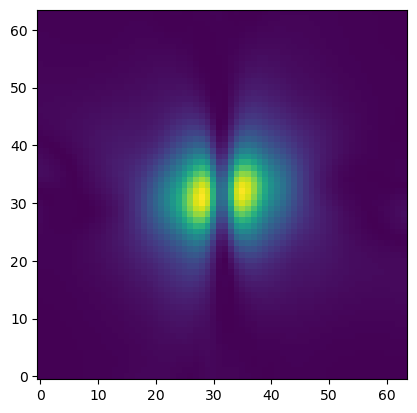

In [ ]:
plt.imshow(Jjnorm[:, :, 0].transpose(), origin='lower')

<matplotlib.image.AxesImage>

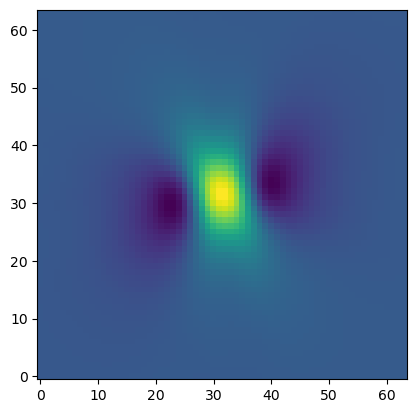

In [ ]:
plt.imshow(Bzz[:, :, 0].transpose(), origin='lower')

<matplotlib.image.AxesImage>

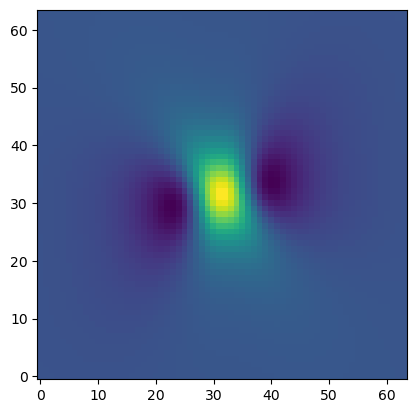

In [ ]:
plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower')

In [ ]:
jnp.linalg.norm(Bb, axis=-1).shape

(64, 64, 64)

In [ ]:
jnp.sum(Bb**2, axis=-1).shape

(64, 64, 64)

<matplotlib.image.AxesImage>

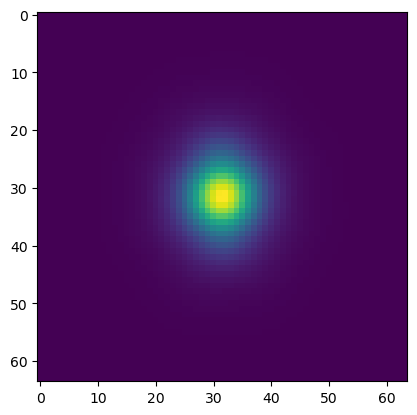

In [ ]:
plt.imshow(jnp.sum(Bb**2, axis=-1)[:, :, 0])
#plt.imshow(Bxx[:, :, 0]**2+Byy[:, :, 0]**2+Bzz[:, :, 0]**2)

<matplotlib.image.AxesImage>

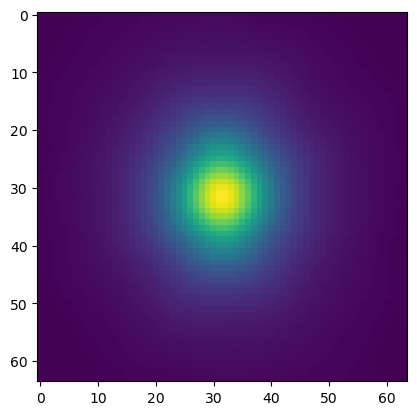

In [ ]:
plt.imshow(jnp.linalg.norm(Bb, axis=-1)[:, :, 0])

In [ ]:
import pyvista as pv

In [ ]:
pv.set_jupyter_backend('static')

In [ ]:
x, y, z = jnp.meshgrid(jnp.squeeze(xx), jnp.squeeze(yy), jnp.squeeze(zz), indexing='ij')
points = np.vstack((x.ravel(), y.ravel(), z.ravel())).T
vectors = np.vstack((Bxx.ravel(), Byy.ravel(), Bzz.ravel())).T
pdata = pv.vector_poly_data(points, vectors)

In [ ]:
points.shape

(262144, 3)

In [ ]:
# p = pv.Plotter()
# p.show_bounds()
# p.add_mesh(pdata.outline())
# p.add_mesh(pdata)
# p.show()

In [ ]:
xmin, xmax, ymin, ymax, zmin, zmax = pdata.bounds
xsize, ysize, zsize = xmax-xmin, ymax-ymin, zmax-zmin
xcenter, ycenter, zcenter = (xmin+xmax)/2, (ymin+ymax)/2, (zmin+zmax)/2

In [ ]:
grid = pv.StructuredGrid()
grid.points = points
grid.dimensions = (64, 64, 64)
grid['B'] = vectors
grid.active_vectors_name = 'B'
magnitude = np.linalg.norm(vectors, axis=-1)
grid['mag'] = magnitude
grid.active_scalars_name = 'mag'

In [ ]:
bottom_subset = (0, 0, 0, 63, 0, 63)
bottom = grid.extract_subset(bottom_subset).extract_surface()
bottom

PolyData (0x7ff4d1d58760)
  N Cells:    3969
  N Points:   4096
  N Strips:   0
  X Bounds:   0.000e+00, 2.000e+00
  Y Bounds:   0.000e+00, 2.000e+00
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   4

In [ ]:
x_bottom = bottom.points[:, 0].reshape(Nx, Ny)
y_bottom = bottom.points[:, 1].reshape(Nx, Ny)
B_bottom = bottom['B'].reshape(Nx, Ny, 3)

In [ ]:
from zpinn.pinn_nf2_visualization import draw_grid

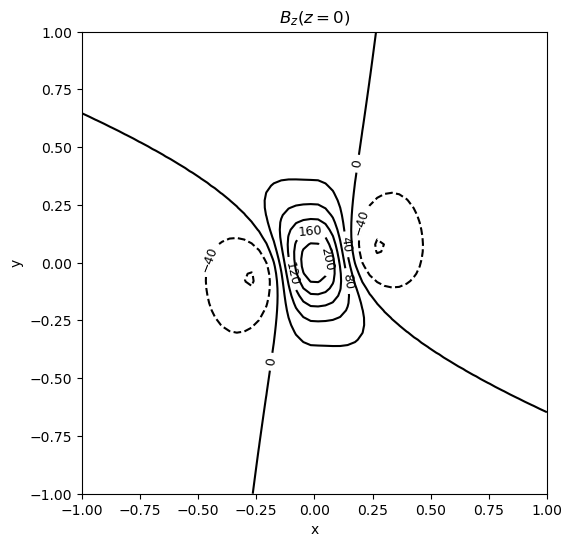

In [ ]:
bbb = draw_grid(b.grid)
bbb.plt_Bz()

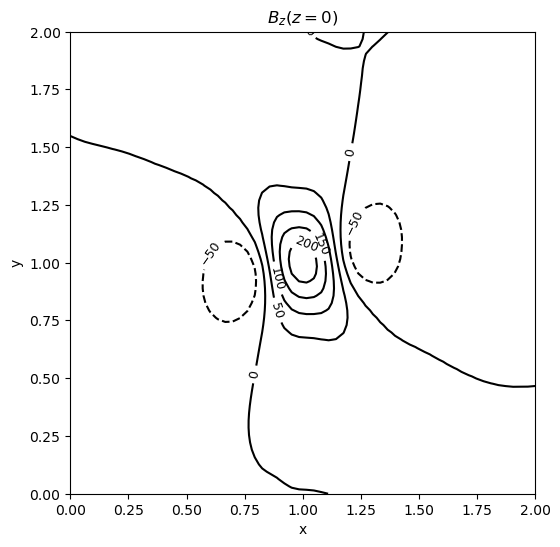

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.contour(x_bottom, y_bottom, B_bottom[:, :, 2], 
                    origin='lower', colors='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title(r"$B_z(z=0)$")
plt.show()

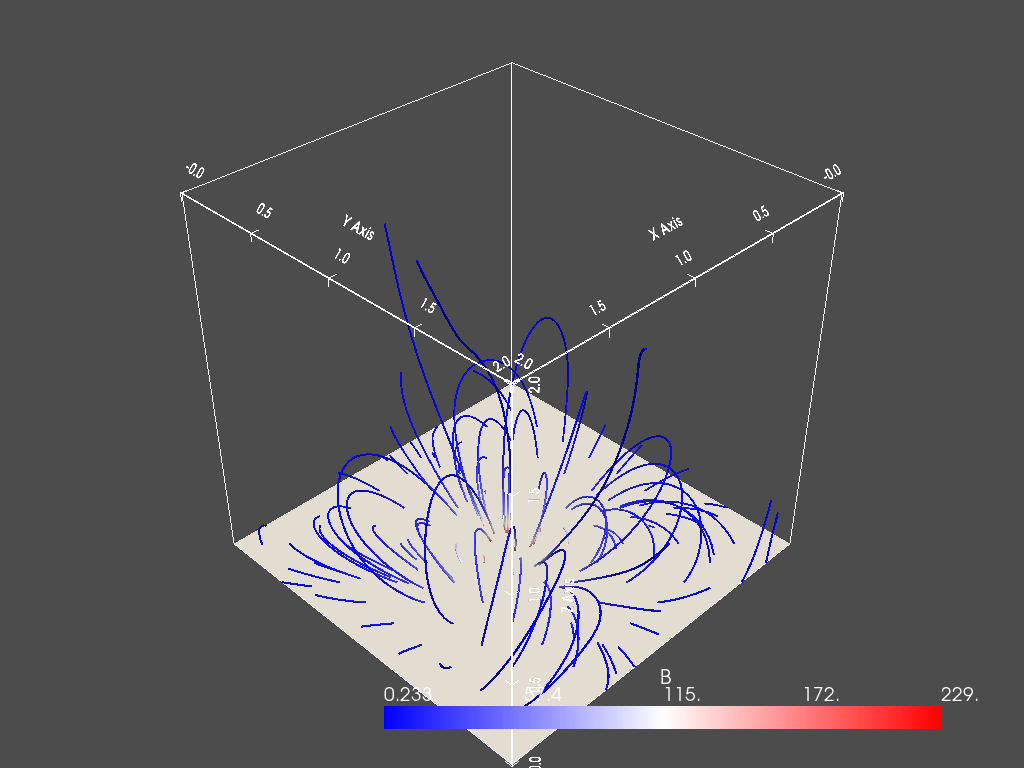

In [ ]:
p = pv.Plotter()
p.show_bounds()
p.add_mesh(grid.outline())
seed = pv.Plane(center=(xcenter, ycenter, 0), direction=(0,0,1), 
                    i_size=xsize, j_size=ysize, 
                    i_resolution=10, j_resolution=10)
p.add_mesh(seed)
strl = grid.streamlines_from_source(seed,
                                    vectors='B',
                                    max_time=180,
                                    initial_step_length=0.01,
                                    integration_direction='both')
        
p.add_mesh(strl.tube(radius=xsize/400), cmap='bwr', ambient=0.2)
p.show()

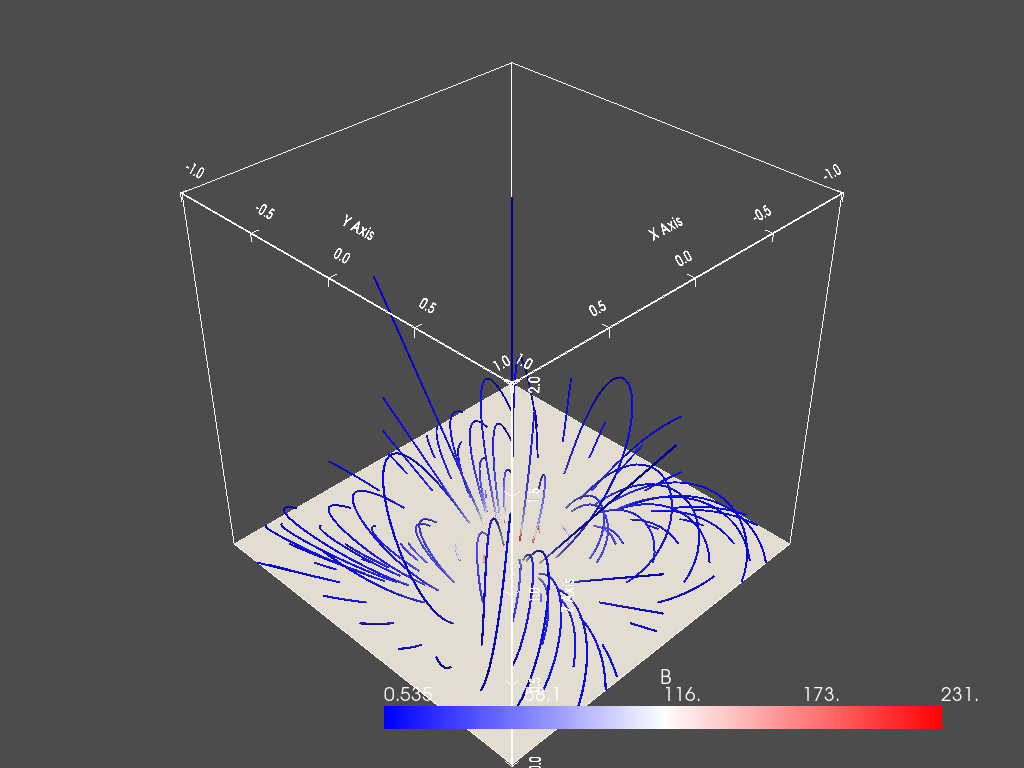

In [ ]:
bbb.pv_streamline()